Copyright ©2021-2022. Stephen Rigden.
This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.
This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
You should have received a copy of the GNU General Public License along with this program.  If not, see <http://www.gnu.org/licenses/>.

# Heart Rate - Alternative Visualizations

Change History
10/28/2021 Started

In [1]:
import pandas
from pathlib import Path
from matplotlib import pyplot
import seaborn
seaborn.set_style('darkgrid')  # one of {darkgrid, whitegrid, dark, white, ticks}

In [2]:
heart_df_pickle = Path.cwd().parent / 'data' / 'processed' / 'heart_df.pickle'

### Get the heart pickle and analyse its structure

In [3]:
ds = pandas.read_pickle(heart_df_pickle)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188620 entries, 5 to 188624
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        188620 non-null  datetime64[ns]
 1   heart rate  188620 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.3 MB


In [4]:
ds.head()
ds = ds.set_index('date')
ds.head()

,heart rate
date,
2020-03-30 20:11:49,67.0
2020-03-30 20:16:17,67.0
2020-03-30 20:21:09,61.0
2020-03-30 20:21:13,64.0
2020-03-30 20:21:18,63.0


In [5]:
gt_start = ds.index >= '2021-05-01'

In [6]:
ds_short = ds.loc[gt_start, :]
ds_short.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95839 entries, 2021-05-01 00:10:00 to 2021-10-31 16:13:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   heart rate  95839 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


In [7]:
ds_day = ds_short.resample('D').mean()
print(ds_day.info())
ds_day.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184 entries, 2021-05-01 to 2021-10-31
Freq: D
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   heart rate  184 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB
None


,heart rate
date,
2021-05-01,79.236026
2021-05-02,66.067341
2021-05-03,69.374025
2021-05-04,68.775204
2021-05-05,75.086593


<AxesSubplot:xlabel='date'>

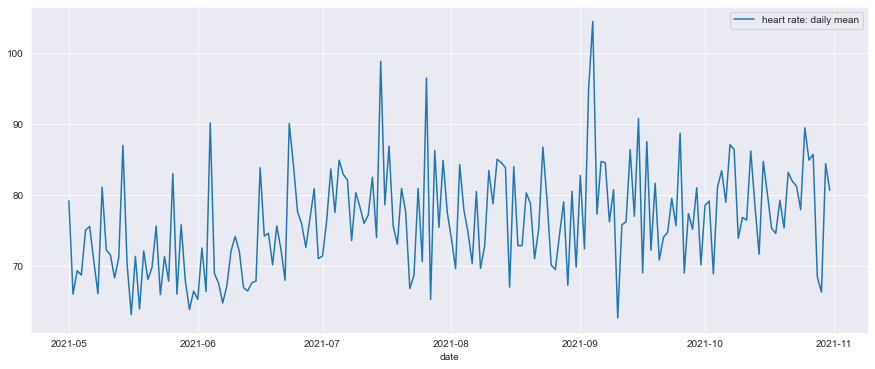

In [8]:
fig, axes_ = pyplot.subplots(figsize=(15, 6))
plot = seaborn.lineplot(data=ds_day, palette='tab10', linewidth=1.5, ax=axes_)
plot.legend(labels=['heart rate: daily mean'])
plot

In [9]:
ds_short_7 = ds_short.resample('7D').mean()
ds_short_7.head()

,heart rate
date,
2021-05-01,72.540645
2021-05-08,74.644566
2021-05-15,68.333319
2021-05-22,72.713620
2021-05-29,70.995180


<AxesSubplot:xlabel='date'>

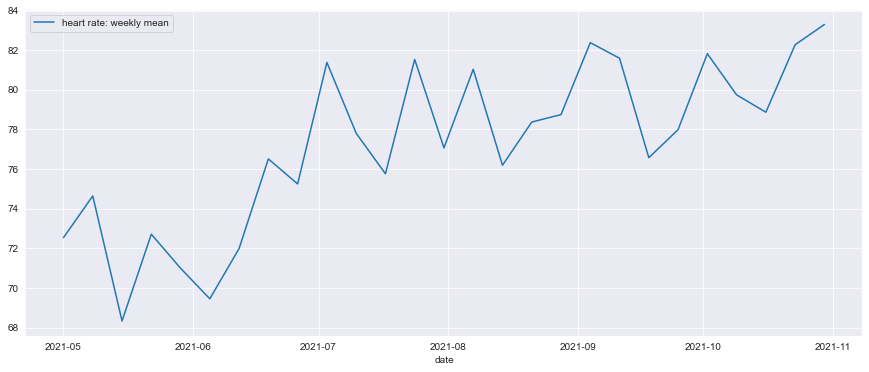

In [10]:
fig, axes_ = pyplot.subplots(figsize=(15, 6))
plot = seaborn.lineplot(data=ds_short_7, palette='tab10', linewidth=1.5, ax=axes_)
plot.legend(labels=['heart rate: weekly mean'])
plot

## Scatter Plotting

<AxesSubplot:xlabel='date'>

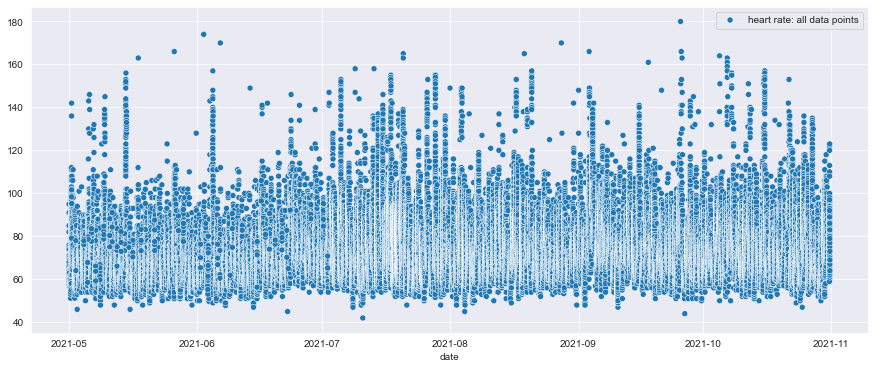

In [11]:
fig, axes_ = pyplot.subplots(figsize=(15, 6))
plot = seaborn.scatterplot(data=ds_short, palette='tab10', ax=axes_)
plot.legend(labels=['heart rate: all data points'])
plot

# Scatter plotting 2

Tutorial: [Plotting with categorical data](https://seaborn.pydata.org/tutorial/categorical.html)

<AxesSubplot:xlabel='date'>

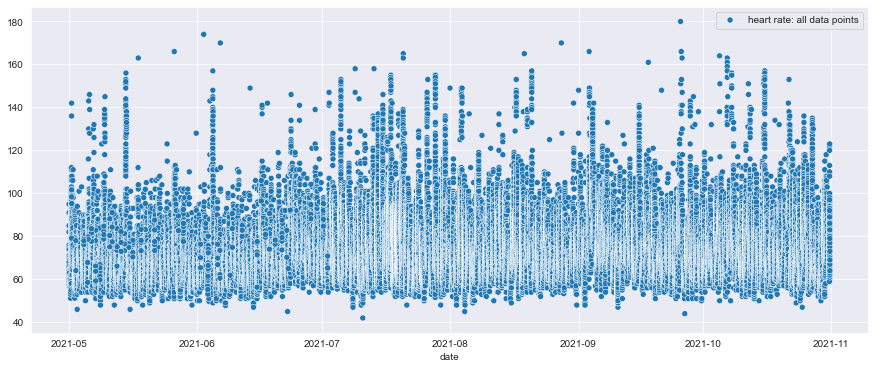

In [12]:
fig, axes_ = pyplot.subplots(figsize=(15, 6))
plot = seaborn.scatterplot(data=ds_short, palette='tab10', ax=axes_)
plot.legend(labels=['heart rate: all data points'])
plot